In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_house=pd.read_csv("train.csv")

In [3]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_house.shape

(1460, 81)

In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data cleaning

In [6]:
#calculate percentage of null values in each columns
df_house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
cols=df_house.columns
for column in cols:
    percentage_null=(df_house[column].isnull().sum()/df_house.shape[0])*100
    print("Null %  in column "+ column+ " = "+str(percentage_null)+ "%")

Null %  in column Id = 0.0%
Null %  in column MSSubClass = 0.0%
Null %  in column MSZoning = 0.0%
Null %  in column LotFrontage = 17.73972602739726%
Null %  in column LotArea = 0.0%
Null %  in column Street = 0.0%
Null %  in column Alley = 93.76712328767123%
Null %  in column LotShape = 0.0%
Null %  in column LandContour = 0.0%
Null %  in column Utilities = 0.0%
Null %  in column LotConfig = 0.0%
Null %  in column LandSlope = 0.0%
Null %  in column Neighborhood = 0.0%
Null %  in column Condition1 = 0.0%
Null %  in column Condition2 = 0.0%
Null %  in column BldgType = 0.0%
Null %  in column HouseStyle = 0.0%
Null %  in column OverallQual = 0.0%
Null %  in column OverallCond = 0.0%
Null %  in column YearBuilt = 0.0%
Null %  in column YearRemodAdd = 0.0%
Null %  in column RoofStyle = 0.0%
Null %  in column RoofMatl = 0.0%
Null %  in column Exterior1st = 0.0%
Null %  in column Exterior2nd = 0.0%
Null %  in column MasVnrType = 0.547945205479452%
Null %  in column MasVnrArea = 0.547945205479

### Columns Alley ,FireplaceQu,PoolQC,Fence, Miscfeature have vale NA which dosent mean Null value.
### These are valid values as per data dictionary, i.e No alley acces,No pool etc
### But pandas treat it as Null values


In [8]:
df_house["Alley"]=df_house["Alley"].fillna(value="NoAlley")
df_house["FireplaceQu"]=df_house["FireplaceQu"].fillna(value="NoFireplace")
df_house["PoolQC"]=df_house["PoolQC"].fillna(value= "NoPool")
df_house["Fence"]=df_house["Fence"].fillna(value="NoFence")
df_house["MiscFeature"]=df_house["MiscFeature"].fillna(value="NoMisc" )

In [9]:
# rechecking again so that none of columns have higher number of null values
cols=df_house.columns
for column in cols:
    percentage_null=(df_house[column].isnull().sum()/df_house.shape[0])*100
    if percentage_null>=50:
        print("Null %  in column "+ column+ " = "+str(percentage_null)+ "%")

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

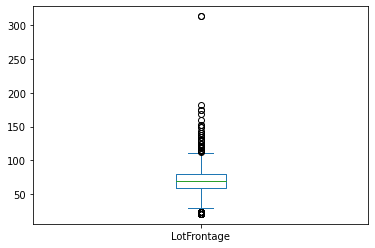

In [10]:
#Null column handling for LotFrontage column
df_house["LotFrontage"].plot.box()
df_house["LotFrontage"].describe()

In [11]:
# since mean and median are comparable impute null values with mean
df_house.loc[df_house.LotFrontage.isnull()==True,"LotFrontage"]=df_house.LotFrontage.mean()

In [12]:
# checking for null values again
df_house.LotFrontage.isnull().sum()

0

In [13]:
# drop rows which have null % < 5%
df_house=(df_house[df_house.MasVnrType.isnull()!=True])
df_house=(df_house[df_house.MasVnrArea.isnull()!=True])
df_house=(df_house[df_house.Electrical.isnull()!=True])


### Columns BsmtQual, BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 have values NA which means no basement
### Pandas treat them as Null values

In [14]:
# replacing NA with no basement
df_house["BsmtQual"]=df_house["BsmtQual"].fillna(value="NoBasement")
df_house["BsmtCond"]=df_house["BsmtCond"].fillna(value="NoBasement")
df_house["BsmtExposure"]=df_house["BsmtExposure"].fillna(value= "NoBasement")
df_house["BsmtFinType1"]=df_house["BsmtFinType1"].fillna(value="NoBasement")
df_house["BsmtFinType2"]=df_house["BsmtFinType2"].fillna(value="NoBasement" )

In [15]:
#Garage type NA means no garage. Pandas treat them as Null values. Hence replacing NA as no garage
df_house.GarageType.fillna(value="NoGarage",inplace=True)

In [16]:
#GarageFinish NA means no garage. Pandas treat them as Null values. Hence replacing NA as no garage
df_house.GarageFinish.fillna(value="NoGarage",inplace=True)

In [17]:
#GarageQual NA means no garage. Pandas treat them as Null values. Hence replacing NA as no garage

df_house.GarageQual.fillna(value="NoGarage",inplace=True)

In [18]:
#GarageCond NA means no garage. Pandas treat them as Null values. Hence replacing NA as no garage
df_house.GarageCond.fillna(value="NoGarage",inplace=True)


In [19]:
# garage year built and year finished both are year , it is observed that both are NA values i.e No garage
# Replace it with values 0
df_house.GarageYrBlt.fillna(value=0,inplace=True)
df_house.GarageFinish.fillna(value=0,inplace=True)

In [20]:
#Making sure there are no null values
cols=df_house.columns
for column in cols:
    percentage_null=(df_house[column].isnull().sum()/df_house.shape[0])*100
    if percentage_null>0:
        print("Null %  in column "+ column+ " = "+str(percentage_null)+ "%")

#### Null values in data are cleaned

In [21]:
# check if any duplicate rows present
df_house[df_house.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### DATA TYPE HANDLING

In [22]:
#MSSubClass,OverallQual,OverallCond are given as integer values, but are ordered categorical variables, convert it to data type object
cols=["MSSubClass","OverallQual","OverallCond"]
df_house[cols]=df_house[cols].astype("object")

### Dummy variable creation for categorical columns

In [23]:
# extract categorical columns
df_house_categorical=df_house.select_dtypes(include="object")

In [24]:
df_house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NoPool,NoFence,NoMisc,WD,Normal
1,20,RL,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NoPool,NoFence,NoMisc,WD,Normal
2,60,RL,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NoPool,NoFence,NoMisc,WD,Normal
3,70,RL,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NoPool,NoFence,NoMisc,WD,Abnorml
4,60,RL,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NoPool,NoFence,NoMisc,WD,Normal


In [25]:
# extract all categorical columns
catcols=df_house_categorical.columns

In [26]:
#convert categorical columns to dummy variable encoding
df_house_categorical=pd.get_dummies(df_house_categorical,drop_first=True)

In [27]:
df_house_categorical.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# drop the original categorical variables
df_house=df_house.drop(catcols,axis=1)

In [29]:
# concatenate with original data frame
df_house=pd.concat([df_house,df_house_categorical],axis=1)

In [30]:
df_house.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [31]:
# ID field is of no use in predicting price, therefore drop it
df_house=df_house.drop(["Id"],axis=1)

### Derived metrics

In [32]:
# Creating column age of property
df_house["property_age"]=df_house["YrSold"]-df_house["YearBuilt"]


In [33]:
# Creating column time since property was remodeled
df_house["remodel_age"]=df_house["YrSold"]-df_house["YearRemodAdd"]

In [34]:
# Creating column garage age
df_house["garage_age"]=df_house["YrSold"]-df_house["GarageYrBlt"]

In [35]:
df_house=df_house.drop(["YrSold","GarageYrBlt","YearRemodAdd","YearBuilt","MoSold"],axis=1)

In [36]:
# creating a column with total porche area
df_house["total_porche"]=df_house["OpenPorchSF"]+df_house["EnclosedPorch"]+df_house["3SsnPorch"]+df_house["ScreenPorch"]


In [37]:
# drop original columns
df_house=df_house.drop(["OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"],axis=1)

In [38]:
#creating a column with total bathrooms
df_house["total_bathrooms"]=df_house["BsmtFullBath"]+0.5 * df_house["BsmtHalfBath"]+df_house["FullBath"]+0.5 *df_house["HalfBath"]


In [39]:
# drop original columns
df_house=df_house.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1)

### Outlier analysis

In [40]:
# extract numeric columns
df_house_num=df_house.select_dtypes(include=["int64","float64"])

In [41]:
num_cols=df_house_num.columns

In [42]:
df_house.shape

(1451, 280)

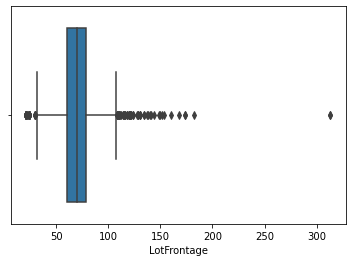

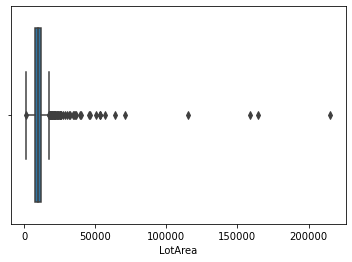

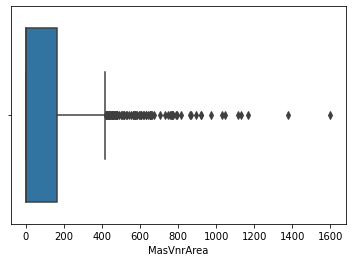

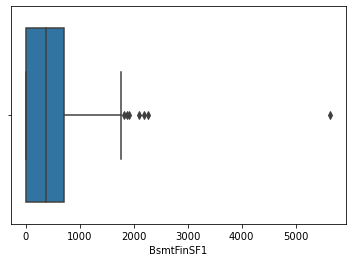

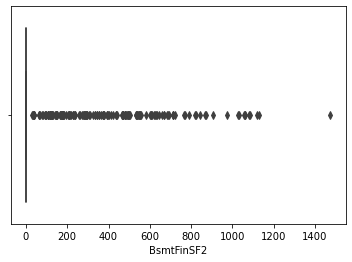

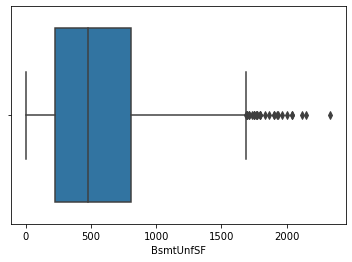

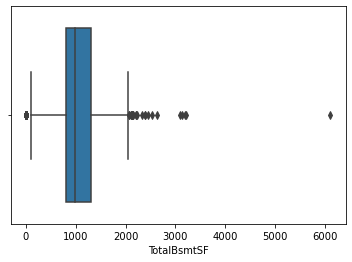

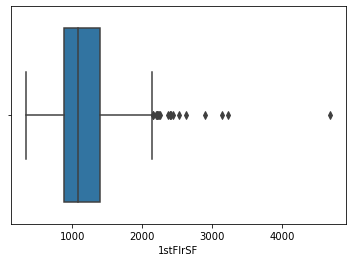

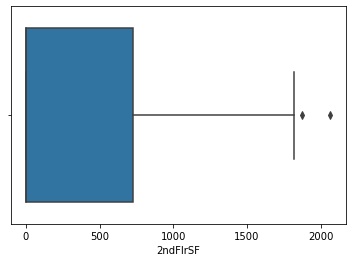

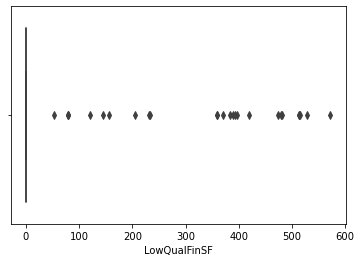

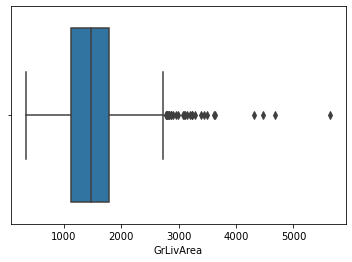

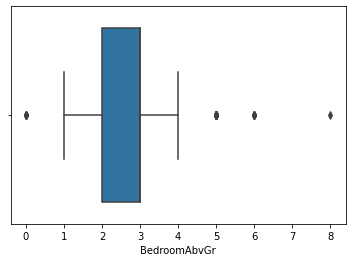

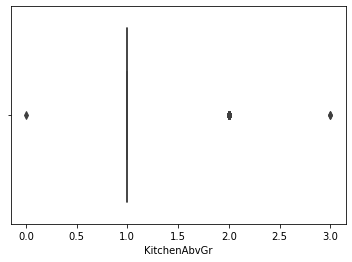

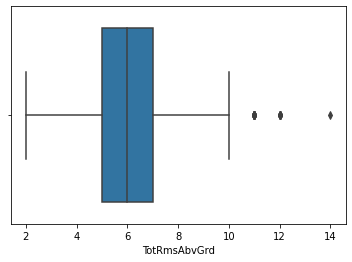

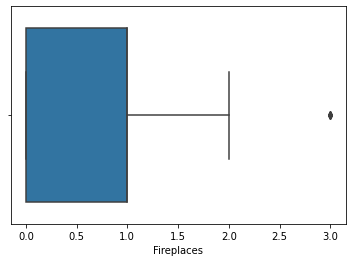

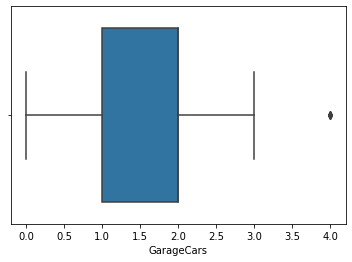

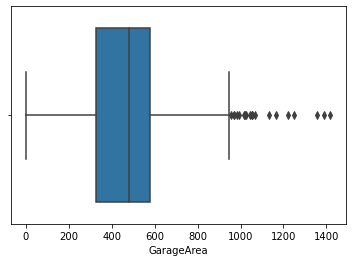

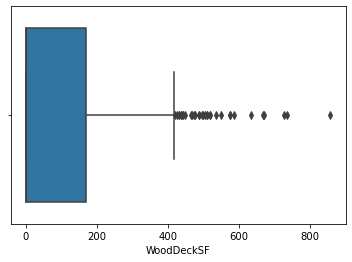

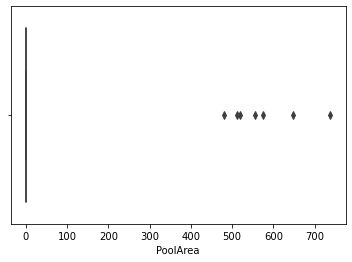

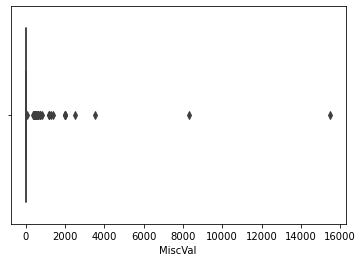

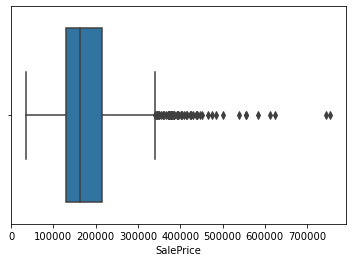

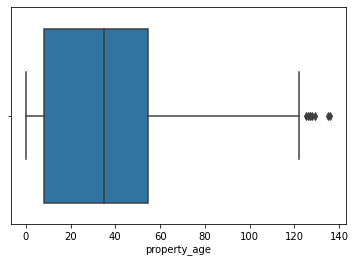

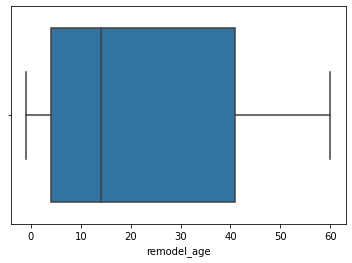

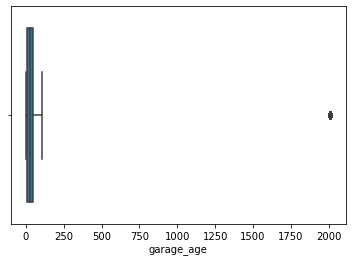

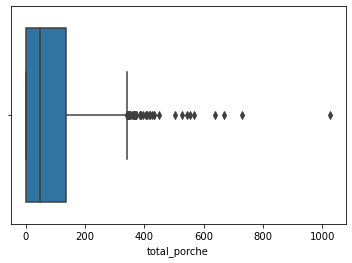

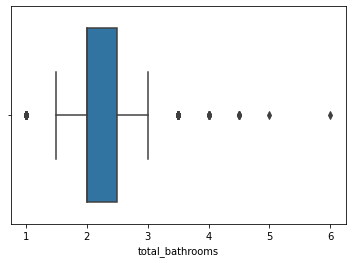

In [43]:
#Plot box plots for all numerical variables
for i in num_cols:
    plt.figure()
    sns.boxplot(df_house_num[i])

In [44]:
# As seen in above box plots LotFrontage","LotArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","GrLivArea","3SsnPorch","SalePrice" have outliers
# remove these outliers
cols=["LotFrontage","LotArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","GrLivArea","SalePrice","total_porche"]
for i in cols:
    q25=df_house[i].quantile(0.25)
    q75=df_house[i].quantile(0.99)
    iqr=q75-q25
    cutoff=iqr * 1.5
    lower=q25-cutoff
    upper=q75+cutoff
    df_house=df_house[(df_house[i]>=lower) & ((df_house[i]<=upper))]





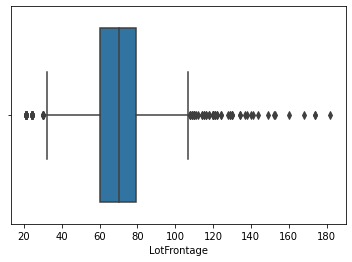

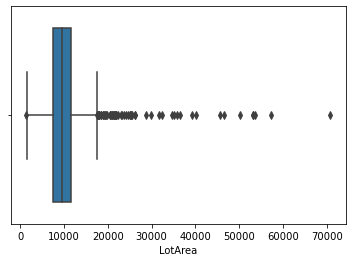

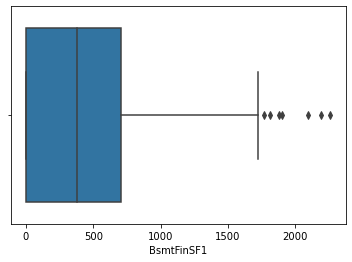

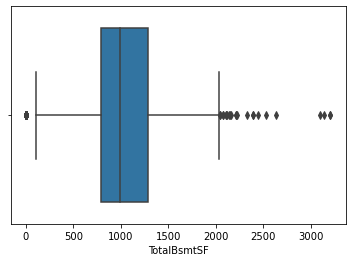

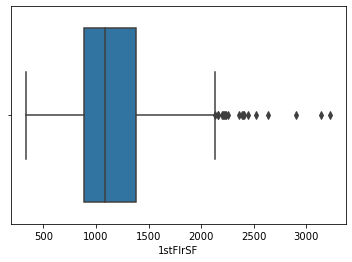

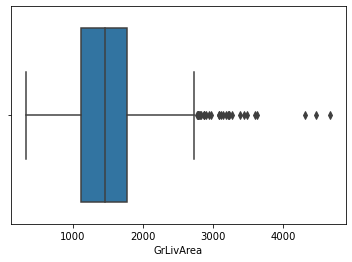

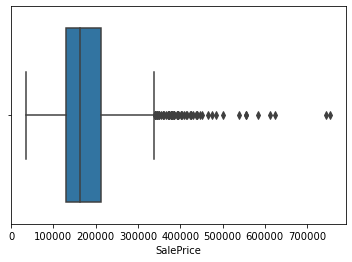

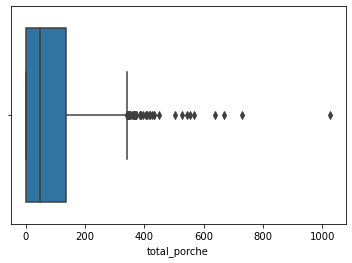

In [45]:
# Boxplot after outlier removal
for i in cols:
    plt.figure()
    sns.boxplot(df_house[i])

In [46]:
df_house.shape

(1445, 280)

<AxesSubplot:>

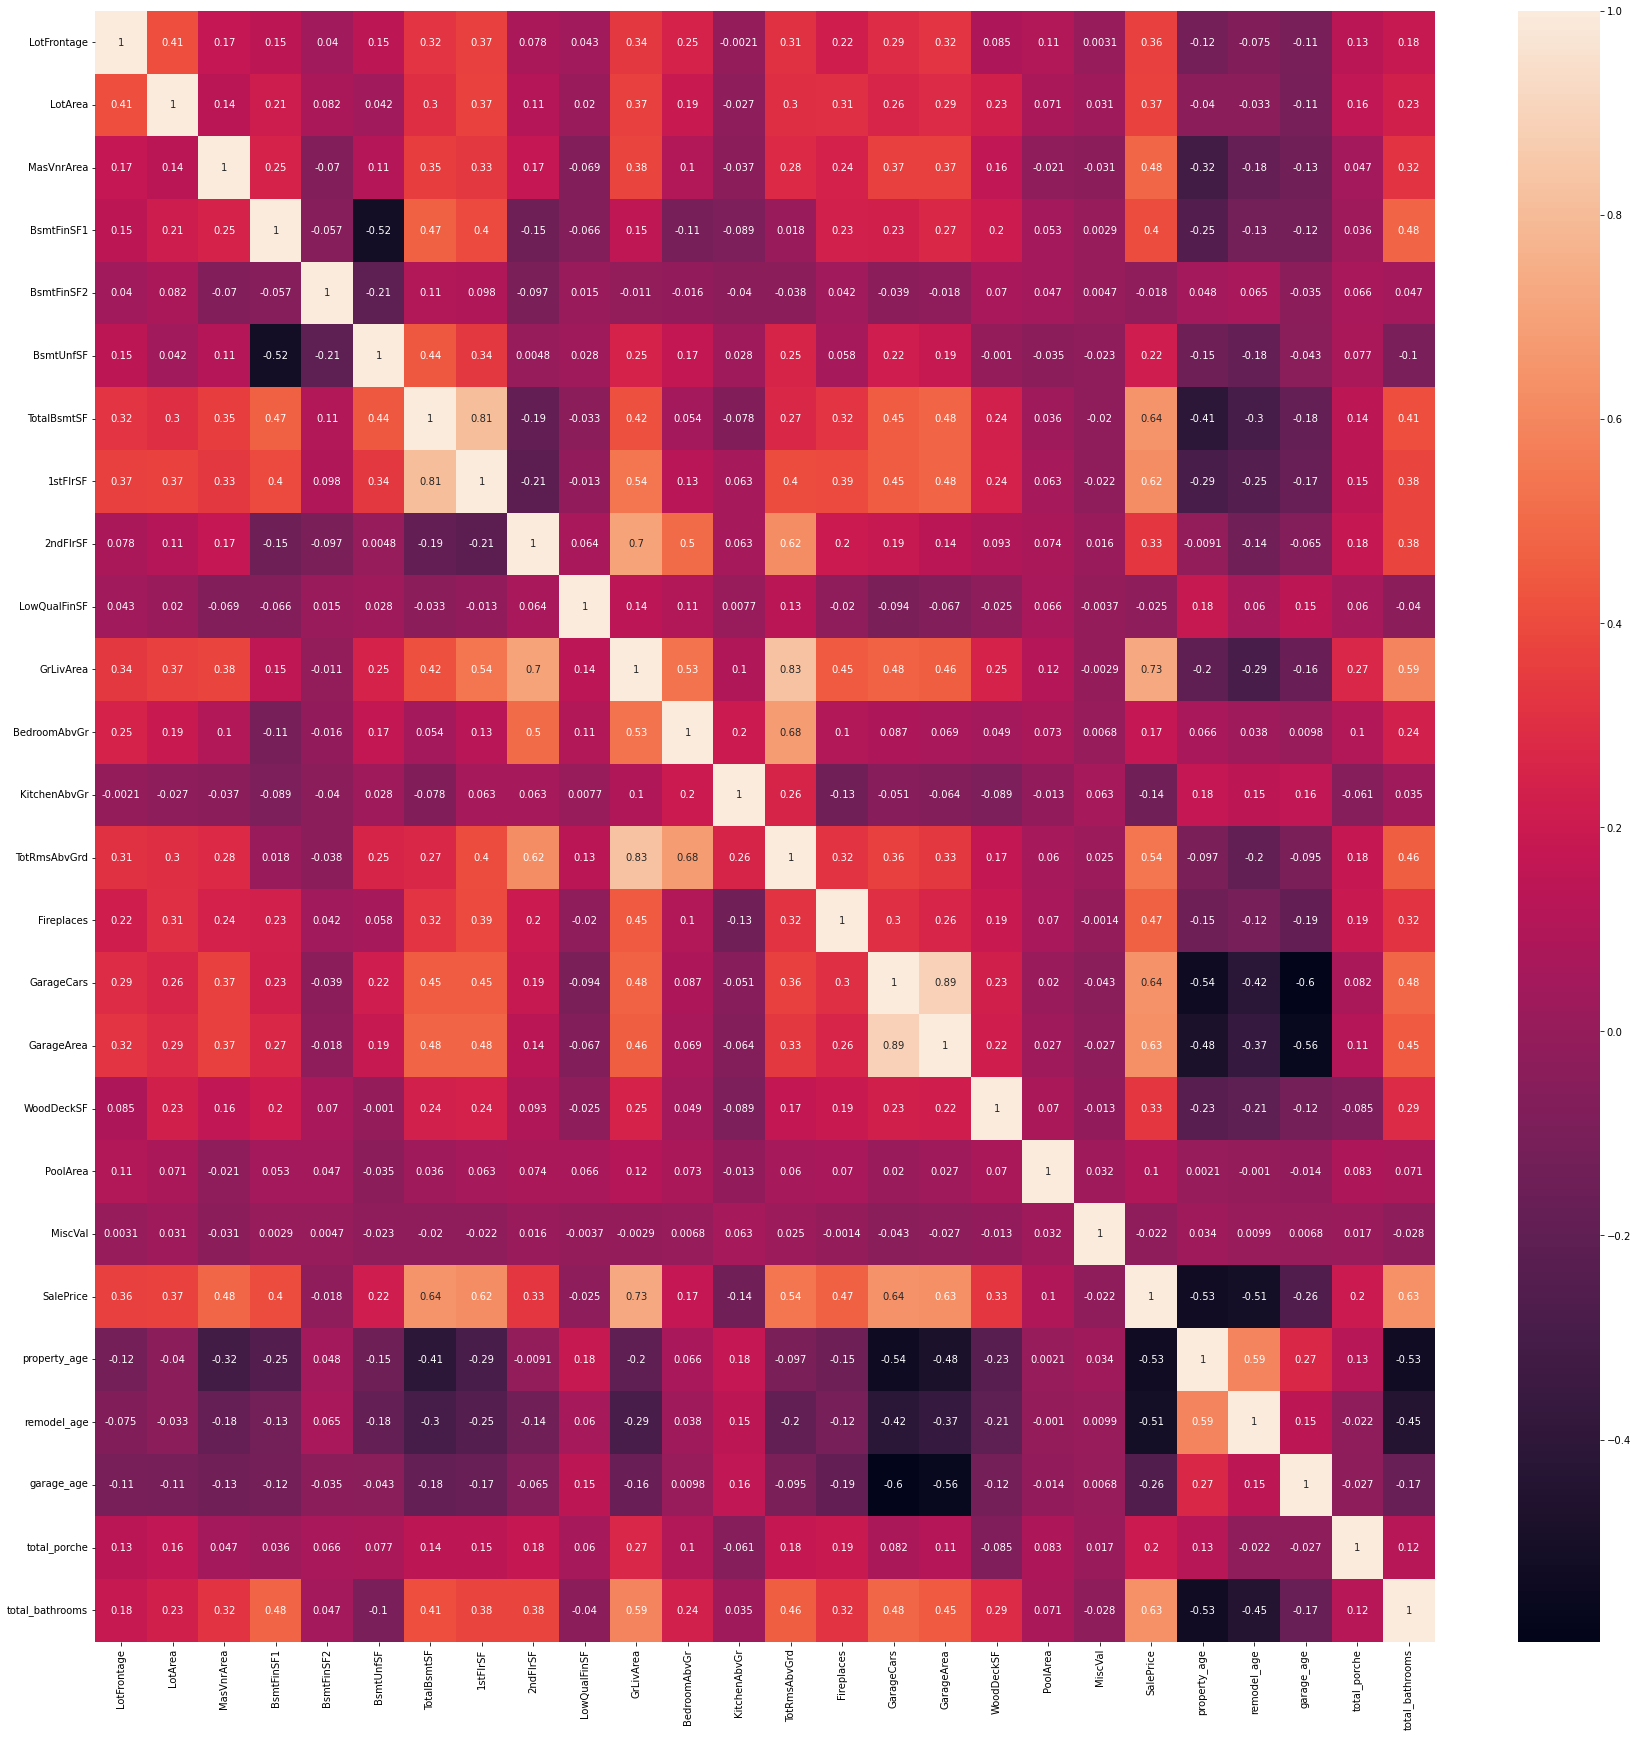

In [47]:
# Heatmap for numerical variables
plt.figure(figsize=(30,30))
df_house_num=df_house.select_dtypes(include=["int64","float64"])
sns.heatmap(df_house_num.corr(),annot=True)

In [48]:
# garage cars and garage area are highly correleated, remove garage cars column
# property age and garage age are higly correlated , so remove garage age
# TotRmsAbvGrd and living area sq ft are correlated , drop TotRmsAbvGrd
df_house = df_house.drop(["GarageCars","garage_age","TotRmsAbvGrd"],axis=1)

### Creating train test split

In [49]:
df_train,df_test = train_test_split(df_house, train_size=0.8, random_state=100)

### Scaling

In [50]:
cols=df_train.columns
scaler=MinMaxScaler()
df_train[cols]=scaler.fit_transform(df_train[cols])
df_test[cols]=scaler.transform(df_test[cols])

### Creation of dependant and independant variables

In [51]:
y_train=df_train.pop("SalePrice")
X_train=df_train
y_test=df_test.pop("SalePrice")
X_test=df_test

### Use RFE for selection of features

In [52]:
lm=LinearRegression()
rfe=RFE(lm,150)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=150)

In [53]:
rfe_cols=X_train.columns[rfe.support_]

In [54]:
rfe_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'property_age', 'total_porche',
       'total_bathrooms'],
      dtype='object', length=150)

In [55]:
X_train=X_train[rfe_cols]
X_test=X_test[rfe_cols]

### Calculating VIF to detect multicollinearity

In [56]:

# Calculate the VIFs for the new model
vif=pd.DataFrame()
vif['features']=X_train.columns
vif['vif']=[variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
75,OverallCond_5,inf
89,RoofMatl_WdShngl,inf
125,GarageType_NoGarage,inf
119,Electrical_Mix,inf
74,OverallCond_4,inf
...,...,...
143,SaleType_Oth,1.11
97,Exterior2nd_Other,1.11
138,SaleType_CWD,1.11
60,Condition2_RRAn,NaN


In [57]:
# dropping columns with high VIF
low_vif=vif[vif["vif"]<=5]

In [58]:
low_vif

,features,vif
66,HouseStyle_2.5Unf,4.77
117,BsmtFinType2_Rec,4.35
115,BsmtFinType2_LwQ,4.34
12,KitchenAbvGr,3.96
44,Neighborhood_NAmes,3.87
...,...,...
104,Foundation_Wood,1.14
80,RoofStyle_Gambrel,1.13
143,SaleType_Oth,1.11
97,Exterior2nd_Other,1.11


In [59]:
# Select final columns with Low VIFs
final_cols=low_vif['features']

In [60]:
X_train=X_train[final_cols]
X_test=X_test[final_cols]

### Hyperparameter Tuning

### Performing Ridge regression

In [61]:
# Fitting the ridge model for alpha=10 
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [62]:
# R2 score for train set
y_pred_train=ridge.predict(X_train)
r2_score(y_train,y_pred_train)

0.8255017777744245

In [63]:
# r2 score for test set
y_pred_test=ridge.predict(X_test)
r2_score(y_test,y_pred_test)

0.7832517039097251

In [64]:
# Fitting the ridge model for alpha=0.1 
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
# R2 score for train set
y_pred_train=ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))
# r2 score for test set
y_pred_test=ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8538945656168768
0.7947289511213461


### Finding optimal value of alpha for Ridge regression using grid search hyperparameter tuning

In [65]:
# list of alphas to tune

alphas =[{"alpha":[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}]

# instantiating estimator
lm=Ridge()

folds=5

ridge_cv= GridSearchCV(
                    estimator=lm,
    
                    param_grid=alphas,
    
                    scoring="neg_mean_absolute_error",
    
                    cv=folds,
    
                    return_train_score=True,
    
                    verbose=1)

ridge_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                    100, 500, 1000]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# print the best value of alpha
print(ridge_cv.best_params_)

{'alpha': 5.0}


In [67]:
# print the best estimator
print(ridge_cv.best_estimator_)

Ridge(alpha=5.0)


In [68]:
gridsearch_results = pd.DataFrame(ridge_cv.cv_results_)
gridsearch_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003399,0.000800,0.002400,0.001959,0.0001,{'alpha': 0.0001},-0.033743,-0.036005,-0.035666,-0.032976,...,-0.035003,0.001397,23,-0.030490,-0.030395,-0.030335,-0.030759,-0.030055,-0.030407,0.000228
1,0.002599,0.000799,0.001202,0.000404,0.001,{'alpha': 0.001},-0.033744,-0.036003,-0.035665,-0.032974,...,-0.035001,0.001397,22,-0.030490,-0.030395,-0.030335,-0.030759,-0.030056,-0.030407,0.000228
2,0.003525,0.006099,0.000200,0.000400,0.01,{'alpha': 0.01},-0.033752,-0.035986,-0.035658,-0.032954,...,-0.034987,0.001390,21,-0.030492,-0.030398,-0.030337,-0.030761,-0.030062,-0.030410,0.000226
3,0.001000,0.001265,0.004027,0.006120,0.05,{'alpha': 0.05},-0.033783,-0.035913,-0.035631,-0.032868,...,-0.034929,0.001366,20,-0.030499,-0.030408,-0.030345,-0.030770,-0.030089,-0.030422,0.000221
4,0.002199,0.000401,0.001000,0.000632,0.1,{'alpha': 0.1},-0.033817,-0.035828,-0.035598,-0.032768,...,-0.034866,0.001347,19,-0.030507,-0.030420,-0.030356,-0.030782,-0.030121,-0.030437,0.000215
5,0.003126,0.006251,0.000000,0.000000,0.2,{'alpha': 0.2},-0.033874,-0.035689,-0.035554,-0.032591,...,-0.034763,0.001327,18,-0.030531,-0.030442,-0.030375,-0.030815,-0.030186,-0.030470,0.000207
6,0.001627,0.001541,0.000800,0.000748,0.3,{'alpha': 0.3},-0.033920,-0.035590,-0.035542,-0.032436,...,-0.034692,0.001331,17,-0.030554,-0.030470,-0.030391,-0.030848,-0.030250,-0.030503,0.000199
7,0.003204,0.001476,0.001397,0.000486,0.4,{'alpha': 0.4},-0.033957,-0.035516,-0.035535,-0.032299,...,-0.034631,0.001340,16,-0.030576,-0.030499,-0.030415,-0.030879,-0.030305,-0.030535,0.000194
8,0.002013,0.000025,0.001000,0.000632,0.5,{'alpha': 0.5},-0.033995,-0.035448,-0.035527,-0.032181,...,-0.034578,0.001349,15,-0.030602,-0.030527,-0.030439,-0.030917,-0.030357,-0.030569,0.000193
9,0.000000,0.000000,0.000000,0.000000,0.6,{'alpha': 0.6},-0.034027,-0.035384,-0.035516,-0.032075,...,-0.034528,0.001358,14,-0.030626,-0.030554,-0.030463,-0.030960,-0.030405,-0.030602,0.000195


Text(0, 0.5, 'mean_test_score')

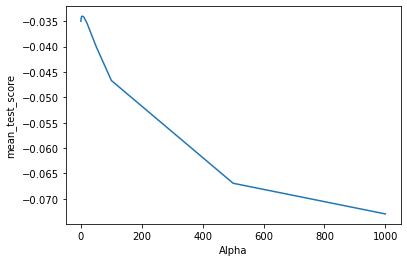

In [69]:
plt.plot(gridsearch_results['param_alpha'],gridsearch_results["mean_test_score"])
plt.xlabel("Alpha")
plt.ylabel("mean_test_score")

In [70]:
# Fitting the ridge model for alpha=5 
ridge=Ridge(alpha=5)
ridge.fit(X_train,y_train)
ridge.coef_

array([-5.58219085e-03, -1.39429216e-02, -4.47553294e-03, -4.95736213e-02,
       -3.34540010e-02,  1.06500940e-02,  1.27582093e-01,  5.08585786e-03,
       -5.40951119e-03, -1.38506744e-02, -8.35862808e-03, -3.34002006e-02,
        1.03655771e-01, -1.25764656e-02,  3.43327908e-04, -1.25452815e-02,
       -1.02952463e-02,  6.37651072e-02, -1.19706929e-02,  1.61403824e-01,
       -3.99237149e-02, -2.72091632e-02, -7.60476549e-03,  1.36908032e-01,
       -1.21874843e-02,  3.97720224e-02, -1.04912759e-02,  1.58132857e-02,
       -3.12333432e-02, -3.07860055e-02,  6.24778919e-02, -2.15249216e-02,
       -2.77260847e-02, -1.54170411e-02,  5.64007812e-02, -3.03265084e-05,
        2.23666519e-02, -3.18541799e-02, -3.51782694e-02, -2.08044963e-02,
        6.90913737e-02,  1.69828056e-02, -8.60546835e-03,  6.84561643e-02,
       -9.44634141e-03, -1.79170858e-02,  2.47205549e-02,  3.21681625e-02,
       -5.48821148e-02,  7.68739221e-03, -1.74626205e-02, -2.83008346e-03,
        2.54563744e-02, -

In [71]:
# Ridge features and coeffecients
df_ridge=pd.DataFrame({"Features":X_train.columns,"Ridge_coeff":ridge.coef_})
df_ridge.sort_values(by="Ridge_coeff",ascending=False).head(20)

,Features,Ridge_coeff
19,OverallQual_10,0.161404
23,OverallQual_9,0.136908
6,total_bathrooms,0.127582
12,GarageArea,0.103656
40,MasVnrArea,0.069091
43,Fireplaces,0.068456
17,LotArea,0.063765
30,LotFrontage,0.062478
34,OverallQual_8,0.056401
54,Neighborhood_StoneBr,0.051053


### Model evaluation

In [72]:
# R2 score for train set
y_pred_train=ridge.predict(X_train)
r2_score(y_train,y_pred_train)

0.8381756791623846

In [73]:
# r2 score for test set
y_pred_test=ridge.predict(X_test)
r2_score(y_test,y_pred_test)

0.7901229503531468

In [74]:
# RSS for train and test
rss_train=np.sum(np.square(y_train-y_pred_train))
print("rss_train",rss_train)
rss_test=np.sum(np.square(y_test-y_pred_test))
print("rss_test",rss_test)

rss_train 2.385269294957413
rss_test 0.5701768593714885


In [75]:
# RMSE for train and test
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
rmse_train = (mse_train_lr**0.5)
print("RMSE TRAIN",rmse_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
rmse_test = (mse_test_lr**0.5)
print("RMSE TEST",rmse_test)

0.0020633817430427445
RMSE TRAIN 0.04542446194555027
0.001972930309243905
RMSE TEST 0.04441768014252776


### Performing Lasso regression- Finding optimal value of alpha using grid search 


In [76]:
# list of alphas to tune

alphas =[{"alpha":[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}]

# instantiating estimator
lm=Lasso()

folds=5

lasso_cv= GridSearchCV(
                    estimator=lm,
    
                    param_grid=alphas,
    
                    scoring="neg_mean_absolute_error",
    
                    cv=folds,
    
                    return_train_score=True,
    
                    verbose=1)

lasso_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                    100, 500, 1000]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
gridsearch_results = pd.DataFrame(lasso_cv.cv_results_)
gridsearch_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003200,0.000400,0.002002,0.000633,0.0001,{'alpha': 0.0001},-0.033904,-0.033932,-0.035655,-0.031065,...,-0.034019,0.001657,1,-0.031093,-0.030917,-0.030718,-0.031508,-0.030681,-0.030983,0.000301
1,0.002600,0.000490,0.001401,0.000490,0.001,{'alpha': 0.001},-0.040269,-0.037318,-0.037109,-0.033123,...,-0.036710,0.002325,2,-0.035164,-0.036062,-0.035553,-0.036240,-0.035778,-0.035759,0.000380
2,0.001200,0.001470,0.000413,0.000506,0.01,{'alpha': 0.01},-0.071006,-0.061539,-0.068918,-0.059664,...,-0.064842,0.004369,3,-0.063018,-0.064498,-0.064218,-0.066786,-0.064279,-0.064560,0.001228
3,0.000103,0.000207,0.000000,0.000000,0.05,{'alpha': 0.05},-0.086155,-0.077117,-0.085488,-0.076235,...,-0.081129,0.004112,4,-0.079033,-0.082161,-0.080646,-0.082893,-0.080531,-0.081053,0.001351
4,0.003116,0.006232,0.003143,0.006286,0.1,{'alpha': 0.1},-0.086155,-0.077117,-0.085488,-0.076235,...,-0.081129,0.004112,4,-0.079033,-0.082161,-0.080646,-0.082893,-0.080531,-0.081053,0.001351
5,0.000000,0.000000,0.003127,0.006253,0.2,{'alpha': 0.2},-0.086155,-0.077117,-0.085488,-0.076235,...,-0.081129,0.004112,4,-0.079033,-0.082161,-0.080646,-0.082893,-0.080531,-0.081053,0.001351
6,0.003125,0.006251,0.003609,0.006046,0.3,{'alpha': 0.3},-0.086155,-0.077117,-0.085488,-0.076235,...,-0.081129,0.004112,4,-0.079033,-0.082161,-0.080646,-0.082893,-0.080531,-0.081053,0.001351
7,0.002629,0.000457,0.001853,0.000774,0.4,{'alpha': 0.4},-0.086155,-0.077117,-0.085488,-0.076235,...,-0.081129,0.004112,4,-0.079033,-0.082161,-0.080646,-0.082893,-0.080531,-0.081053,0.001351
8,0.001587,0.000794,0.000800,0.000402,0.5,{'alpha': 0.5},-0.086155,-0.077117,-0.085488,-0.076235,...,-0.081129,0.004112,4,-0.079033,-0.082161,-0.080646,-0.082893,-0.080531,-0.081053,0.001351
9,0.003140,0.006280,0.000000,0.000000,0.6,{'alpha': 0.6},-0.086155,-0.077117,-0.085488,-0.076235,...,-0.081129,0.004112,4,-0.079033,-0.082161,-0.080646,-0.082893,-0.080531,-0.081053,0.001351


Text(0, 0.5, 'mean_test_score')

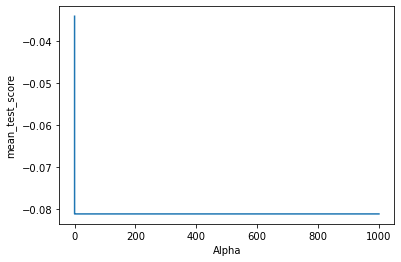

In [78]:
plt.plot(gridsearch_results['param_alpha'],gridsearch_results["mean_test_score"])
plt.xlabel("Alpha")
plt.ylabel("mean_test_score")

In [79]:
print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [80]:
# Fitting lasso regression for alpha =0.0001

lasso=Lasso(alpha=0.0001)

lasso.fit(X_train,y_train)
lasso.coef_


array([-0.        , -0.01180534, -0.00077491, -0.07540822, -0.02746553,
        0.        ,  0.13078692,  0.        , -0.        , -0.00739114,
       -0.        , -0.02949284,  0.11050909, -0.0108355 ,  0.        ,
       -0.00932493, -0.0017903 ,  0.09019698, -0.00960151,  0.24398498,
       -0.03485007, -0.02854909, -0.00167837,  0.16000994, -0.00469675,
        0.04408338, -0.00953505,  0.01248999, -0.02692826, -0.03227445,
        0.0622607 , -0.01509104, -0.02350388, -0.00364918,  0.06269161,
        0.        ,  0.02486779, -0.02828334, -0.03027555, -0.02014184,
        0.06920262,  0.011694  , -0.00091998,  0.06223689, -0.00381848,
       -0.00958491,  0.02255   ,  0.02420924, -0.22253651,  0.00508972,
       -0.01392976, -0.        ,  0.01994864, -0.00618802,  0.05138485,
        0.00235604,  0.01327036,  0.01699902,  0.0308083 ,  0.        ,
       -0.00549322,  0.        ,  0.02055675,  0.01888936,  0.00900518,
       -0.        , -0.0018448 , -0.        ,  0.02289221,  0.  

### As compared to coeffecients of Ridge regression, Lasso regression coeffecients tend to 0, as there is feature selection

In [81]:
# Lasso features and coeffecients
df_lasso=pd.DataFrame({"Features":X_train.columns,"Lasso_coeff":lasso.coef_})
df_lasso.sort_values(by="Lasso_coeff",ascending=False).head(20)

,Features,Lasso_coeff
19,OverallQual_10,0.243985
23,OverallQual_9,0.160010
6,total_bathrooms,0.130787
12,GarageArea,0.110509
17,LotArea,0.090197
40,MasVnrArea,0.069203
34,OverallQual_8,0.062692
30,LotFrontage,0.062261
43,Fireplaces,0.062237
54,Neighborhood_StoneBr,0.051385


### Model evaluation

In [82]:
#R2 score of train set
y_pred_train=lasso.predict(X_train)
r2_score(y_train,y_pred_train)

0.8472319140817828

In [83]:
# r2 score of test set
y_pred_test=lasso.predict(X_test)
r2_score(y_test,y_pred_test)

0.7905604776879313

In [84]:
# RSS for train and test
rss_train=np.sum(np.square(y_train-y_pred_train))
print("rss_train",rss_train)
rss_test=np.sum(np.square(y_test-y_pred_test))
print("rss_test",rss_test)

rss_train 2.2517815783438015
rss_test 0.5689882207754329


In [85]:
# RMSE for train and test
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
rmse_train = (mse_train_lr**0.5)
print("RMSE TRAIN",rmse_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
rmse_test = (mse_test_lr**0.5)
print("RMSE TEST",rmse_test)

0.001947907939743773
RMSE TRAIN 0.04413511005700307
0.001968817372925373
RMSE TEST 0.04437135757361243


In [86]:
df_lasso.sort_values(by="Lasso_coeff",ascending=False).head(50)

,Features,Lasso_coeff
19,OverallQual_10,0.243985
23,OverallQual_9,0.160010
6,total_bathrooms,0.130787
12,GarageArea,0.110509
17,LotArea,0.090197
40,MasVnrArea,0.069203
34,OverallQual_8,0.062692
30,LotFrontage,0.062261
43,Fireplaces,0.062237
54,Neighborhood_StoneBr,0.051385


### Top variables that contribute for SalePrice
1. OverallQual i.e overall material and finish of the house, excellent
2. Total bathrooms
3. OverallQuall 8 and 10- Very good and excellent
4. LotArea: Lot size in square feet
5. MasVnrArea: Masonry veneer area in square feet
6. Garage area


### Since lasso regression gives feature selection , variables that are insignificant in prediction of sales price



In [87]:
df_lasso[df_lasso.Lasso_coeff==0]

,Features,Lasso_coeff
0,HouseStyle_2.5Unf,-0.0
5,HouseStyle_2.5Fin,0.0
7,Condition2_RRAe,0.0
8,MiscFeature_TenC,-0.0
10,GarageQual_Po,-0.0
14,ExterCond_Po,0.0
35,BsmtFinType2_GLQ,0.0
51,SaleType_ConLD,-0.0
59,Foundation_Stone,0.0
61,Neighborhood_Veenker,0.0


### Best value of alpha 
for Ridge regression : 5

For Lasso regression : 0.0001

### SUBJECTIVE QUESTIONS

In [88]:
# double value of alpha for ridge
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [89]:
# Ridge features and coeffecients
df_ridge=pd.DataFrame({"Features":X_train.columns,"Ridge_coeff":ridge.coef_})
df_ridge.sort_values(by="Ridge_coeff",ascending=False).head(20)

,Features,Ridge_coeff
19,OverallQual_10,0.127584
23,OverallQual_9,0.123191
6,total_bathrooms,0.123165
12,GarageArea,0.099088
43,Fireplaces,0.070863
40,MasVnrArea,0.064875
30,LotFrontage,0.059124
34,OverallQual_8,0.056485
17,LotArea,0.053387
54,Neighborhood_StoneBr,0.045353


In [90]:
# R2 score for train set
y_pred_train=ridge.predict(X_train)
r2_score(y_train,y_pred_train)

0.8255017777744245

In [91]:
# r2 score for test set
y_pred_test=ridge.predict(X_test)
r2_score(y_test,y_pred_test)

0.7832517039097251

In [92]:
lasso=Lasso(alpha=0.0002)

lasso.fit(X_train,y_train)
df_lasso=pd.DataFrame({"Features":X_train.columns,"Lasso_coeff":lasso.coef_})
df_lasso.sort_values(by="Lasso_coeff",ascending=False).head(20)

,Features,Lasso_coeff
19,OverallQual_10,0.233046
23,OverallQual_9,0.161911
6,total_bathrooms,0.130977
12,GarageArea,0.112216
17,LotArea,0.079767
34,OverallQual_8,0.066158
43,Fireplaces,0.064780
40,MasVnrArea,0.060709
30,LotFrontage,0.059299
54,Neighborhood_StoneBr,0.046892


### Building Lasso model excuding top 5 predictor

In [93]:
X_train_exclude=X_train.drop(["OverallQual_9","total_bathrooms","GarageArea","OverallQual_10","LotArea"],axis=1)

In [94]:
lasso=Lasso(alpha=0.0001)

lasso.fit(X_train_exclude,y_train)
df_lasso=pd.DataFrame({"Features":X_train_exclude.columns,"Lasso_coeff":lasso.coef_})
df_lasso.sort_values(by="Lasso_coeff",ascending=False).head(20)

,Features,Lasso_coeff
35,MasVnrArea,0.210886
25,LotFrontage,0.164082
38,Fireplaces,0.117448
49,Neighborhood_StoneBr,0.102430
20,BedroomAbvGr,0.079208
42,BsmtExposure_Gd,0.066291
53,total_porche,0.061741
47,MasVnrType_Stone,0.055468
29,OverallQual_8,0.039754
59,LotShape_IR2,0.039197


In [95]:
# R2 score for train set
y_pred_train=lasso.predict(X_train_exclude)
r2_score(y_train,y_pred_train)

0.6838906395431037

In [96]:
# r2 score for test set
y_pred_test=lasso.predict(X_test[X_train_exclude.columns])
r2_score(y_test,y_pred_test)

0.640018949932232